In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df=pd.read_csv(r'.....\Udemy courses\data set\dataset.csv')
df

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13603,3005408,מושגים בסיסיים באופציות חלק ב,/course/1-ndgzhu/,False,47,0.00000,0.00000,0.00000,0,False,6,0,2020-04-15T10:20:17Z,2020-04-23T02:06:55Z,NaN,NaN,NaN,NaN,NaN,NaN
13604,3467284,Programa de Integridade,/course/iaudit_programa_de_integridade/,False,19,0.00000,0.00000,0.00000,0,False,5,0,2020-09-01T17:57:15Z,2020-09-03T15:26:47Z,NaN,NaN,NaN,NaN,NaN,NaN
13605,3368222,Goodwill and Method of Calculating Goodwill (A...,/course/goodwill-and-method-of-calculating-goo...,False,47,0.00000,0.00000,0.00000,0,False,5,0,2020-07-27T02:29:18Z,2020-07-31T12:14:40Z,NaN,NaN,NaN,NaN,NaN,NaN
13606,3211345,Poderoso Investidor,/course/poderoso-investidor/,False,48,0.00000,0.00000,0.00000,0,False,13,0,2020-06-07T01:29:53Z,2020-07-15T10:35:38Z,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 13392
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            12205 non-null  int64  
 1   title                         12205 non-null  object 
 2   url                           12205 non-null  object 
 3   is_paid                       12205 non-null  bool   
 4   num_subscribers               12205 non-null  int64  
 5   avg_rating                    12205 non-null  float64
 6   avg_rating_recent             12205 non-null  float64
 7   rating                        12205 non-null  float64
 8   num_reviews                   12205 non-null  int64  
 9   is_wishlisted                 12205 non-null  bool   
 10  num_published_lectures        12205 non-null  int64  
 11  num_published_practice_tests  12205 non-null  int64  
 12  created                       12205 non-null  object 
 13  publis

In [6]:
df['title'] = df['title'].apply(lambda x: x.lower())
df['title'] = df['title'].str.replace('[^a-z0-9\s]', '')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Othma\AppData\Local\Temp\ipykernel_3140\3346023201.py:2: SyntaxWarning: invalid escape sequence '\s'
  df['title'] = df['title'].str.replace('[^a-z0-9\s]', '')


In [7]:
columns_to_drop = [
'id', 'avg_rating', 'url', 'created', 'num_published_lectures', 
'discount_price__currency', 'discount_price__amount', 'published_time','is_paid','discount_price__price_string','price_detail__currency','price_detail__price_string' , 'avg_rating_recent'
]
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [8]:
rating = df['rating']
df.drop(columns=['rating'], axis=1, inplace=True)
df['rating'] = rating

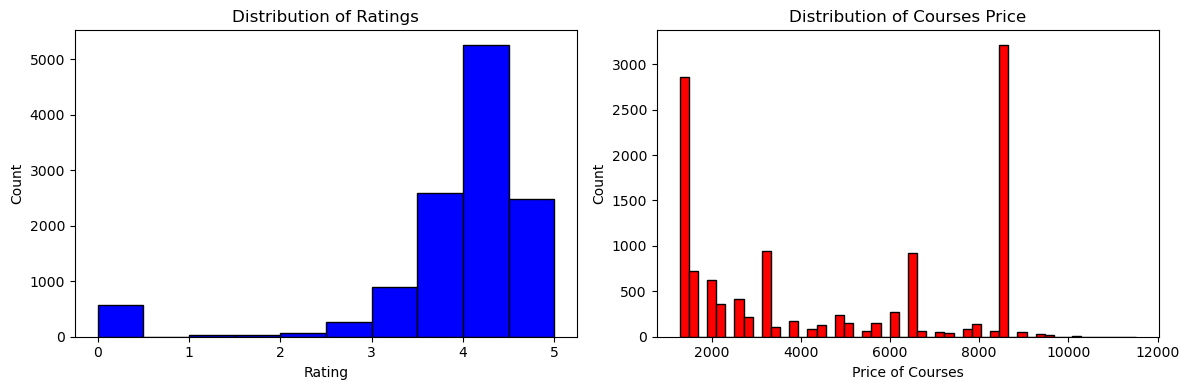

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# histogram for ratings 
axes[0].hist(df['rating'], bins=10, edgecolor='black', color='blue')
axes[0].set_title('Distribution of Ratings')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Count')
# histogram for course prices
axes[1].hist(df['price_detail__amount'], bins=50, edgecolor='black', color='red')
axes[1].set_title('Distribution of Courses Price')
axes[1].set_xlabel('Price of Courses')
axes[1].set_ylabel('Count')
plt.tight_layout()
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder
le_title = LabelEncoder()
le_wishlist = LabelEncoder()
df['title'] = le_title.fit_transform(df['title'])
df['is_wishlisted'] = le_wishlist.fit_transform(df['is_wishlisted'])


In [11]:
def outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q1 = df[column].quantile(0.25)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outlier_indices = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].index
    return outlier_indices
outlier_indices = outliers(df, 'num_subscribers')
outlier_indices = pd.DataFrame(outlier_indices)
outlier_indices


,0
0,0
1,1
2,2
3,3
4,4
...,...
1441,11857
1442,11877
1443,11889
1444,12039


In [12]:
scaler = StandardScaler()
X = df.drop('rating', axis=1) # [1:100] --> [-1:1]
y = df['rating'] 
numerical_cols = ['num_subscribers', 'num_reviews', 'price_detail__amount']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [14]:
train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE for training data:', mean_squared_error(y_train, train_pred)) 
print('MSE for testing data:', mean_squared_error(y_test, test_pred))


MSE for training data: 0.03875995781163939
MSE for testing data: 0.2752150656710367


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = rf.predict(X_test)
# Evaluate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.2752150656710367
Mean Absolute Error: 0.3742395539942647
R-squared: 0.7271375612871376


In [16]:
import joblib
joblib.dump(le_title, "le_title.pkl")
joblib.dump(le_wishlist, "le_wishlist.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(rf, "rf_model.pkl")


['rf_model.pkl']